<a href="https://colab.research.google.com/github/jamesbrowne98/jamesbrowne98/blob/main/CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt






In [2]:
data = pd.read_excel("ENB2012_data.xlsx")
print(data)



       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


inputs = data.values[:,:8].astype(float)

#Normalize the inputs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)

print(inputs.ptp(axis=0))
print(scaled.ptp(axis=0))



[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("ENB2012_data.xlsx")
x = df.iloc[:,1:2].values
y = df.iloc[:,2].values
df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(inputs, scaled)
outputs = regressor.predict(inputs)
print("Random Forest Regressor: \n", outputs)

Random Forest Regressor: 
 [[0.97333333 0.02       0.30285714 ... 0.03333333 0.035      0.038     ]
 [0.97666667 0.0175     0.29857143 ... 0.27666667 0.0325     0.034     ]
 [0.97333333 0.02       0.29857143 ... 0.72       0.0425     0.036     ]
 ...
 [0.01722222 0.97416667 0.67       ... 0.33333333 1.         0.97      ]
 [0.01777778 0.97333333 0.66857143 ... 0.66666667 1.         0.968     ]
 [0.00888889 0.98666667 0.69142857 ... 0.99333333 1.         0.958     ]]


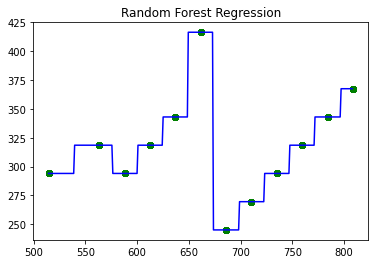

In [6]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(x,y)
y_pred = regressor.predict([[10]])
x_grid = np.arange(min(x),max(x), 0.9)

x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x,y, color = "green")
plt.plot(x_grid, regressor.predict(x_grid), color = "blue")
plt.title("Random Forest Regression")
plt.show()

MLP Regressor

In [7]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()
regressor.fit(inputs, scaled)
outputs = regressor.predict(inputs)
print("MLP Regressor: \n", outputs)

MLP Regressor: 
 [[ 0.63706484  0.02224216  0.8018137  ...  0.18949661  0.74998463
   0.18082919]
 [ 0.52801129 -0.05646744  0.67471597 ...  0.20621656  0.7281798
   0.34105208]
 [ 0.41895775 -0.13517703  0.54761825 ...  0.2229365   0.70637497
   0.50127498]
 ...
 [ 0.23863359  1.33107646  0.63576039 ...  0.98346722  0.56634668
   0.45983123]
 [ 0.12958004  1.25236687  0.50866266 ...  1.00018716  0.54454185
   0.62005413]
 [ 0.02052649  1.17365728  0.38156493 ...  1.01690711  0.52273702
   0.78027702]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Support Vector Machine 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("ENB2012_data.xlsx")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [9]:
targetY1 = data["Y1"]
targetY2 = data["Y2"]

x = df.iloc[:, 1:2].values
Y1 = df.iloc[:, 2].values
Y2 = df.iloc[:, 2].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y1 = sc_y.fit_transform(y.reshape(-1, 1))
y2 = sc_y.fit_transform(y.reshape(-1, 1))

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,Y1,Y2)

SVR()

In [13]:
y_pred = regressor.predict([[8.5]])
y_pred = sc_y.inverse_transform(y_pred)

ValueError: ignored